import some Required library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import data

In [2]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape  # find out volume of data

(88883, 85)

what we can see when we calling specific data from files  

In [3]:
pd.set_option('display.max_columns', 6)   # number of Colums
pd.set_option('display.max_rows', None)   # number of Rows

                                                Create some functions (most common)

Increase-decrease function  (Dictionary)

In [4]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by decrease-growth
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

*

*

*

Will People Born Today Have a Better Life Than Their Parents?   BY COUNTRY


In [5]:
BetterLife = data["BetterLife"]                      # We called necessary data
BetterLife=BetterLife.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Country = data["Country"]                           # We called necessary data
Country.dropna(inplace=True)                        # We filter the data from NaN and empty spaces 

Counted = Counter(Country)                      # Counted Countries 

items = Counted.items()                     # take items from Counted Countries

Country = []                                # list for Countries

for item in items:                          # add Countries into list 
    Country.append(item[0])




Country_Perc = {}     # dictinary for answers 

for i in Country:
    new_data_Yes = data[ (BetterLife == "Yes") & (data["Country"] == i)]  # data by country and  asnwer 'YES"
    all_Quantity = data[ (BetterLife != "Nan") & (data["Country"] == i)]    # data by country and  all answer 

    new_BetterLife = new_data_Yes["BetterLife"]   # add new data into new variable
    all_Quantity = all_Quantity['BetterLife']       # add new data into new variable

    YES = len(new_BetterLife)   # Quantity of answer YES
    All = len(all_Quantity)   # Quantity of all asnwers 
    
    if All > 700:
        percentage = YES / All * 100  # Calculate percentage of people who said "YES"

        Country_Perc[i] = round(percentage,1)  # add answers into  answers Dictinary "Country_Perc = {}"



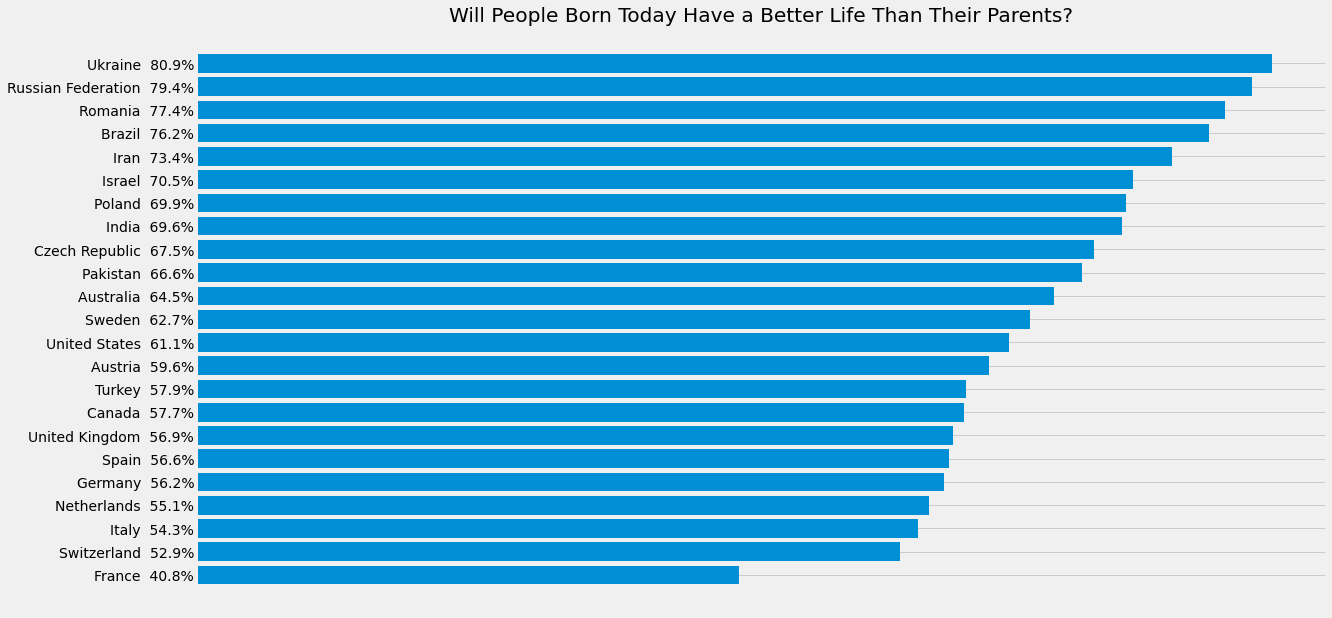

In [7]:

Country_Perc_sorted = sort_Dictionary(Country_Perc, False)   # sort Dictinary by value


key_Phrases = []
percent= []



Country_Perc_items = Country_Perc_sorted.items()

for item in Country_Perc_items:
    key_Phrases.append(item[0])
    percent.append(item[1])





fig, ax = plt.subplots(figsize=(18,10))

langs = key_Phrases


new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


plt.barh(langs, percent)  # თვითონ ნახაზი
plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
    spine.set_visible(False)

ax.axes.get_xaxis().set_visible(False)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
ax.tick_params(axis="y", left=False)

plt.style.use("fivethirtyeight")   # ნახაზის სტილი 


plt.title("Will People Born Today Have a Better Life Than Their Parents?")  # add title


plt.show()


*


*

*


*